<a href="https://colab.research.google.com/github/felixaraj/DataScienceCoursera/blob/master/ARMA_%26_LogisticRegression_22_Oct_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the Dataset**

In [ ]:
firmdata_set = pd.read_csv("Data_Firm_Default_500.csv")

In [ ]:
firmdata_set.head()

,Company,CA,STB,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
0,A C C Ltd.,66110.4,0.0,162938.1,146144.5,986.6,1879.9,0.00,1.24,6.22,0
1,A M D Industries Ltd.,1131.0,253.6,2417.4,1558.4,0.2,191.7,0.51,1.11,0.44,1
2,A C E Exports Ltd.,40.3,22.1,70.6,117.3,0.1,53.9,0.58,1.24,0.68,1
3,20 Microns Ltd.,1893.6,468.9,3996.2,4363.7,2.2,176.4,0.77,1.07,5.53,0
4,A B B India Ltd.,76923.3,0.0,96050.0,67006.2,1001.7,423.8,0.00,1.47,2.37,0


In [ ]:
firmdata_set.tail()

,Company,CA,STB,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
495,Indian Toners & Developers Ltd.,705.8,0.0,2152.7,1191.3,0.4,131.6,0.00,2.52,10.28,1
496,Bajaj Electricals Ltd.,41239.4,10177.1,53737.8,66639.1,30.9,204.8,1.47,1.06,2.97,1
497,Indian Wood Products Co. Ltd.,1053.5,507.3,5009.4,2007.5,1.5,127.9,0.16,1.37,3.56,1
498,Bajaj Healthcare Ltd.,1371.6,0.0,2668.5,3704.6,0.4,69.0,0.91,1.13,7.40,0
499,Indo Amines Ltd.,1900.1,854.2,3044.4,4709.1,0.5,333.5,1.28,0.98,8.28,0


In [ ]:
firmdata_set.isna().sum()

Company      0
CA           0
STB          0
TA           0
SALES        0
CASH         0
TC           0
DER          0
LIQUIDITY    0
ROA          0
DEFAULT      0
dtype: int64

In [ ]:
#ABC = firmdata_set.fillna(method="bfill")

In [ ]:
default = firmdata_set[firmdata_set["DEFAULT"]==1]
no_default = firmdata_set[firmdata_set["DEFAULT"]==0]

In [ ]:
default.head()

,Company,CA,STB,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
1,A M D Industries Ltd.,1131.0,253.6,2417.4,1558.4,0.2,191.7,0.51,1.11,0.44,1
2,A C E Exports Ltd.,40.3,22.1,70.6,117.3,0.1,53.9,0.58,1.24,0.68,1
5,A Infrastructure Ltd.,1271.6,458.3,2175.1,2637.7,1.2,220.4,1.60,1.14,1.60,1
6,Ador Multiproducts Ltd.,35.5,5.9,101.9,72.8,0.1,37.6,0.09,1.34,-15.55,1
13,Archies Ltd.,816.8,160.6,1735.1,1619.6,5.5,67.6,0.15,1.77,0.76,1


In [ ]:
no_default.head()

,Company,CA,STB,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
0,A C C Ltd.,66110.4,0.0,162938.1,146144.5,986.6,1879.9,0.00,1.24,6.22,0
3,20 Microns Ltd.,1893.6,468.9,3996.2,4363.7,2.2,176.4,0.77,1.07,5.53,0
4,A B B India Ltd.,76923.3,0.0,96050.0,67006.2,1001.7,423.8,0.00,1.47,2.37,0
7,Akzo Nobel India Ltd.,27528.0,0.0,34948.0,34594.0,0.0,456.0,0.00,1.24,5.62,0
8,Amber Enterprises India Ltd.,13624.2,540.3,21462.0,21887.5,6.0,314.5,0.17,1.36,4.95,0


In [ ]:
print("Total No. of Firms =", len(firmdata_set))
print("Total No. of Default Firms =", len(default))
print("Total No. of Non-Default Firms =", len(no_default))

Total No. of Firms = 500
Total No. of Default Firms = 265
Total No. of Non-Default Firms = 235


**Prepare the Data for Training and Testing Set**

In [ ]:
firmdata_set.drop(["Company", "CA", "STB"], axis = 1, inplace = True)

In [ ]:
firmdata_set.head()

,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
0,162938.1,146144.5,986.6,1879.9,0.00,1.24,6.22,0
1,2417.4,1558.4,0.2,191.7,0.51,1.11,0.44,1
2,70.6,117.3,0.1,53.9,0.58,1.24,0.68,1
3,3996.2,4363.7,2.2,176.4,0.77,1.07,5.53,0
4,96050.0,67006.2,1001.7,423.8,0.00,1.47,2.37,0


In [ ]:
firmdata_set.dropna()

,TA,SALES,CASH,TC,DER,LIQUIDITY,ROA,DEFAULT
0,162938.1,146144.5,986.6,1879.9,0.00,1.24,6.22,0
1,2417.4,1558.4,0.2,191.7,0.51,1.11,0.44,1
2,70.6,117.3,0.1,53.9,0.58,1.24,0.68,1
3,3996.2,4363.7,2.2,176.4,0.77,1.07,5.53,0
4,96050.0,67006.2,1001.7,423.8,0.00,1.47,2.37,0
...,...,...,...,...,...,...,...,...
495,2152.7,1191.3,0.4,131.6,0.00,2.52,10.28,1
496,53737.8,66639.1,30.9,204.8,1.47,1.06,2.97,1
497,5009.4,2007.5,1.5,127.9,0.16,1.37,3.56,1
498,2668.5,3704.6,0.4,69.0,0.91,1.13,7.40,0


In [ ]:
X = firmdata_set.drop("DEFAULT", axis = 1).values
Y = firmdata_set["DEFAULT"].values

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(X)

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(400, 400, 100, 100)

**Fit Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
loglm = LogisticRegression(random_state=0)
loglm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Testing**

In [ ]:
Y_predict_train = loglm.predict(X_train)
Y_predict_train

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

**Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
con_mat = confusion_matrix(Y_train, Y_predict_train)
con_mat

array([[142,  51],
       [ 38, 169]])

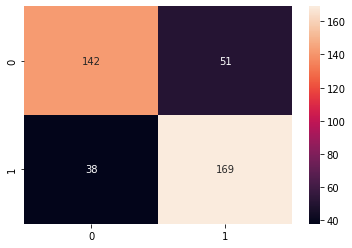

In [ ]:
sns.heatmap(con_mat, annot=True, fmt="d")

In [ ]:
print(classification_report(Y_train, Y_predict_train))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       193
           1       0.77      0.82      0.79       207

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



**Evaluate the Test Data**

In [ ]:
Y_predict_test = loglm.predict(X_test)
Y_predict_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

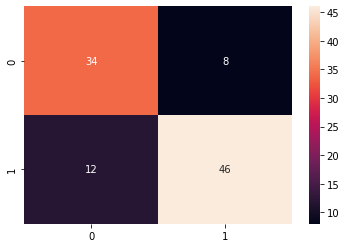

In [ ]:
con_mat_1 = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(con_mat_1, annot = True, fmt="d")

In [ ]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.85      0.79      0.82        58

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



**Time Series Modelling using ARIMA**

In [ ]:
Yt = A +B1Yt-1 +et ........................... AR(1)
Yt = A +B1Yt-1+B2Yt-2 +et ........................... AR(2)

Yt = B +C1Et-1 +e1 ..............................MA(1)
Yt = B +C1Et-1 +C2Et-2 +e1 ..............................MA(2)

Yt = A +B1Yt-1 +B2Yt-2 +C1Et-1 +e1 .............. ARMA(2,1)

Y = (Yt/Yt-1) -1 I=0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 

In [ ]:
mydatats = pd.read_csv("oilpriceindex.csv", index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [ ]:
mydatats.isna().sum()

WTI      1
BRENT    2
INR      2
NIFTY    3
dtype: int64

In [ ]:
mydatats = mydatats.fillna(method="ffill")

**Lets develop the model with NIFTY**

**Identifying the Order of Lags**

ACF = Order of Lags for MA

PACF = Order of Lags for AR

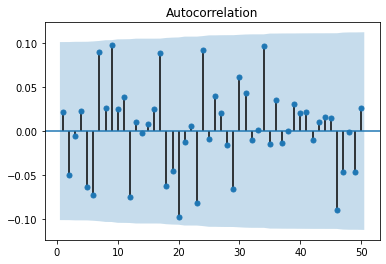

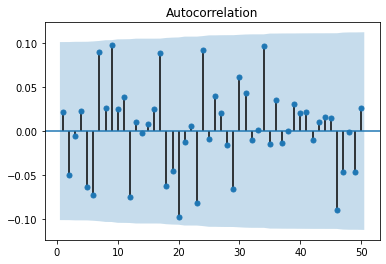

In [ ]:
sgt.plot_acf(mydatats.NIFTY, lags = 50, zero = False)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

**ARMA**

In [ ]:
nifty_ar1_ma1 = ARMA(mydatats.NIFTY, order = (1,1))
result_nifty_ar1_ma1 = nifty_ar1_ma1.fit(start_ar_lags=2)
print(result_nifty_ar1_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                  NIFTY   No. Observations:                  376
Model:                     ARMA(1, 1)   Log Likelihood                -763.279
Method:                       css-mle   S.D. of innovations              1.842
Date:                Fri, 22 Oct 2021   AIC                           1534.559
Time:                        08:25:19   BIC                           1550.277
Sample:                    01-01-1990   HQIC                          1540.799
                         - 04-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1847      0.097      1.905      0.058      -0.005       0.375
ar.L1.NIFTY    -0.8762      0.066    -13.248      0.000      -1.006      -0.747
ma.L1.NIFTY     0.9152      0.052     17.502    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
nifty_ar3_ma3 = ARMA(mydatats.NIFTY, order = (3,3))
result_nifty_ar3_ma3 = nifty_ar3_ma3.fit(start_ar_lags=12)
print(result_nifty_ar3_ma3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  NIFTY   No. Observations:                  376
Model:                     ARMA(3, 3)   Log Likelihood                -760.502
Method:                       css-mle   S.D. of innovations              1.821
Date:                Fri, 22 Oct 2021   AIC                           1537.004
Time:                        08:25:36   BIC                           1568.440
Sample:                    01-01-1990   HQIC                          1549.483
                         - 04-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1841      0.095      1.930      0.054      -0.003       0.371
ar.L1.NIFTY    -0.5456      0.068     -8.028      0.000      -0.679      -0.412
ar.L2.NIFTY    -0.7003      0.028    -25.319    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


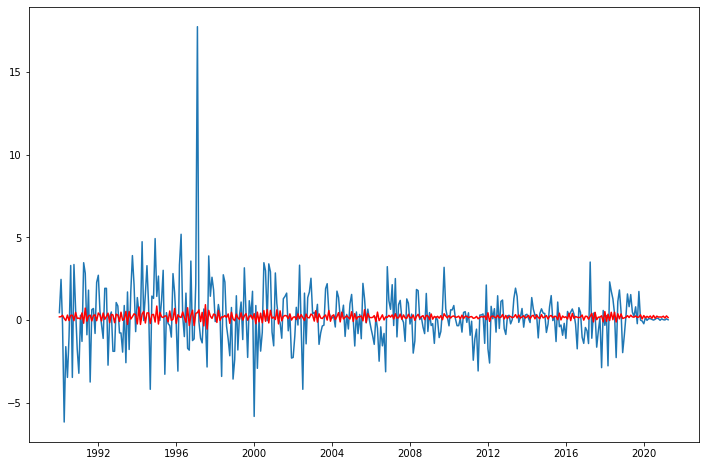

In [ ]:
nifty_ar3_ma3 = ARMA(mydatats.NIFTY, order = (3,3))
result_nifty_ar3_ma3 = nifty_ar3_ma3.fit(start_ar_lags=8)

plt.figure(figsize=(12,8))
plt.plot(mydatats.NIFTY)
plt.plot(result_nifty_ar3_ma3.fittedvalues, color = "red")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


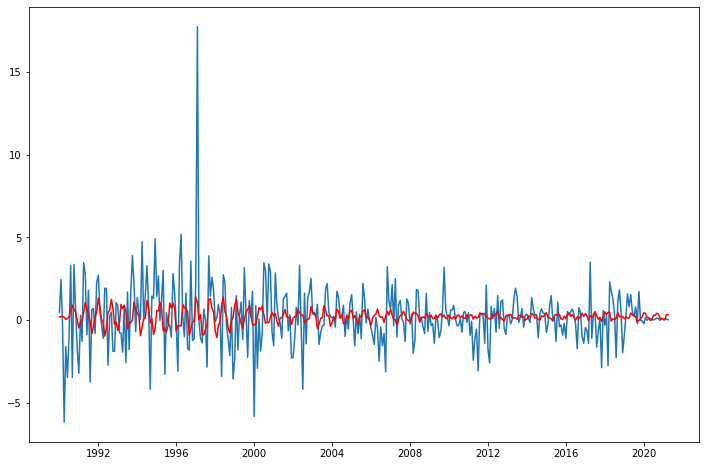

In [ ]:
nifty_ar5_ma5 = ARMA(mydatats.NIFTY, order = (5,5))
result_nifty_ar5_ma5 = nifty_ar5_ma5.fit(start_ar_lags=12)

plt.figure(figsize=(12,8))
plt.plot(mydatats.NIFTY)
plt.plot(result_nifty_ar5_ma5.fittedvalues, color = "red")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


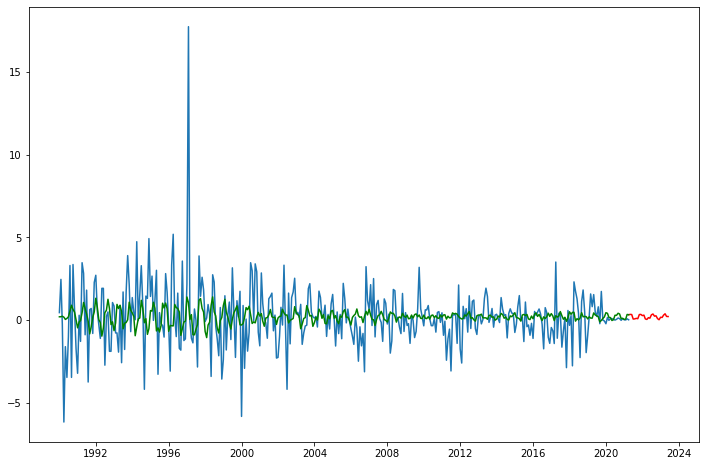

In [ ]:
nifty_ar5_ma5 = ARMA(mydatats.NIFTY, order = (5,5))
result_nifty_ar5_ma5 = nifty_ar5_ma5.fit(start_ar_lags=12)
fcast = result_nifty_ar5_ma5.predict(start="04/01/2021", end="06/01/2023")

plt.figure(figsize=(12,8))
plt.plot(fcast, color = "red")
plt.plot(mydatats.NIFTY)
plt.plot(result_nifty_ar5_ma5.fittedvalues, color = "green")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


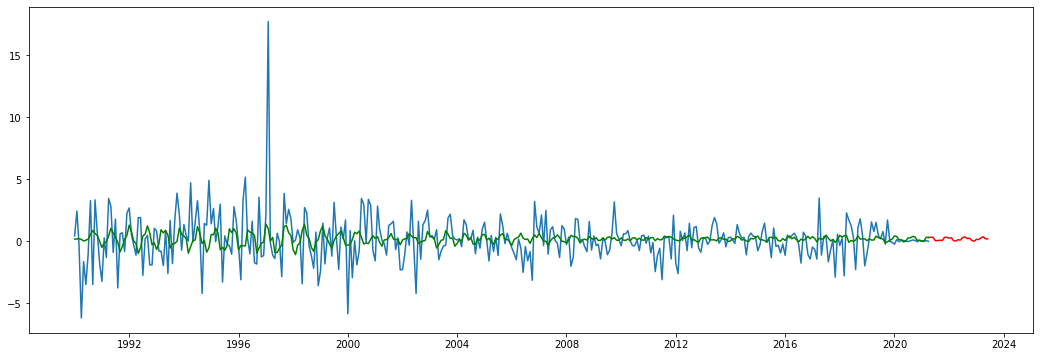

In [ ]:
nifty_ar5_ma5 = ARMA(mydatats.NIFTY, order = (5,5))
result_nifty_ar5_ma5 = nifty_ar5_ma5.fit(start_ar_lags=12)
fcast = result_nifty_ar5_ma5.predict(start="04/01/2021", end="06/01/2023")

plt.figure(figsize=(18,6))
plt.plot(fcast, color = "red")
plt.plot(mydatats.NIFTY)
plt.plot(result_nifty_ar5_ma5.fittedvalues, color = "green")
plt.show()